In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

In [2]:
warnings.filterwarnings('ignore')
# warnings.filterwarnings('ignore', category=FutureWarning)

In [3]:
df = pd.read_csv('imdb_dataset.csv')

In [4]:
df.head()

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Poster-src,Duration (minutes)
0,End of the Spear,6.8,2005,PG-13,Adventure,Jim Hanon,Louie LeonardoChad AllenJack Guzman,45.0,https://m.media-amazon.com/images/M/MV5BMTYxOT...,108.0
1,Elvira Madigan,7.0,1967,PG,Biography,Bo Widerberg,Pia DegermarkThommy BerggrenLennart Malmer,66.0,https://m.media-amazon.com/images/M/MV5BMmY2Nj...,91.0
2,The Kid Stays in the Picture,7.3,2002,R,Documentary,Nanette Burstein,Robert EvansEddie AlbertPeter Bart,75.0,https://m.media-amazon.com/images/M/MV5BZjhiZm...,93.0
3,It Ain't Over,8.2,2022,PG,Documentary,Sean Mullin,Andy AndresRoger AngellMarty Appel,79.0,https://m.media-amazon.com/images/M/MV5BZWViYW...,99.0
4,Mahler,7.0,1974,PG,Biography,Ken Russell,Robert PowellGeorgina HaleLee Montague,66.0,https://m.media-amazon.com/images/M/MV5BYzY4Mz...,115.0


In [5]:
df.columns

Index(['Title', 'IMDb Rating', 'Year', 'Certificates', 'Genre', 'Director',
       'Star Cast', 'MetaScore', 'Poster-src', 'Duration (minutes)'],
      dtype='object')

In [6]:
df.drop(columns='Poster-src', inplace=True)

In [7]:
df.head()

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes)
0,End of the Spear,6.8,2005,PG-13,Adventure,Jim Hanon,Louie LeonardoChad AllenJack Guzman,45.0,108.0
1,Elvira Madigan,7.0,1967,PG,Biography,Bo Widerberg,Pia DegermarkThommy BerggrenLennart Malmer,66.0,91.0
2,The Kid Stays in the Picture,7.3,2002,R,Documentary,Nanette Burstein,Robert EvansEddie AlbertPeter Bart,75.0,93.0
3,It Ain't Over,8.2,2022,PG,Documentary,Sean Mullin,Andy AndresRoger AngellMarty Appel,79.0,99.0
4,Mahler,7.0,1974,PG,Biography,Ken Russell,Robert PowellGeorgina HaleLee Montague,66.0,115.0


In [8]:
df.shape

(3173, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3173 entries, 0 to 3172
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               3173 non-null   object 
 1   IMDb Rating         3173 non-null   float64
 2   Year                3173 non-null   int64  
 3   Certificates        3173 non-null   object 
 4   Genre               3173 non-null   object 
 5   Director            3173 non-null   object 
 6   Star Cast           3173 non-null   object 
 7   MetaScore           3173 non-null   float64
 8   Duration (minutes)  3173 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 223.2+ KB


In [10]:
df.isnull().sum()

Title                 0
IMDb Rating           0
Year                  0
Certificates          0
Genre                 0
Director              0
Star Cast             0
MetaScore             0
Duration (minutes)    0
dtype: int64

In [11]:
df[df['Title'].duplicated(keep=False)]

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes)
0,End of the Spear,6.8,2005,PG-13,Adventure,Jim Hanon,Louie LeonardoChad AllenJack Guzman,45.0,108.0
3,It Ain't Over,8.2,2022,PG,Documentary,Sean Mullin,Andy AndresRoger AngellMarty Appel,79.0,99.0
8,Burden,6.7,2018,R,Biography,Andrew Heckler,Garrett HedlundAndrea RiseboroughForest Whitaker,57.0,117.0
13,A Tale of Love and Darkness,6.0,2015,PG-13,Biography,Natalie Portman,Natalie PortmanGilad KahanaAmir Tessler,55.0,95.0
16,Muscle Shoals,7.8,2013,PG,Documentary,Greg 'Freddy' Camalier,Rick HallAretha FranklinKeith Richards,75.0,111.0
...,...,...,...,...,...,...,...,...,...
3159,The Lord of the Rings: The Two Towers,8.8,2002,PG-13,Action,Peter Jackson,J.R.R. TolkienFran WalshPhilippa Boyens,87.0,179.0
3162,Inception,8.8,2010,PG-13,Action,Christopher Nolan,Leonardo DiCaprioJoseph Gordon-LevittElliot Page,74.0,148.0
3164,The Lord of the Rings: The Fellowship of the Ring,8.9,2001,PG-13,Action,Peter Jackson,J.R.R. TolkienFran WalshPhilippa Boyens,92.0,178.0
3168,The Lord of the Rings: The Return of the King,9.0,2003,PG-13,Action,Peter Jackson,J.R.R. TolkienFran WalshPhilippa Boyens,94.0,201.0


In [12]:
df.drop_duplicates(subset='Title', keep='last', inplace=True)

In [13]:
df.shape

(2739, 9)

In [14]:
df.dtypes

Title                  object
IMDb Rating           float64
Year                    int64
Certificates           object
Genre                  object
Director               object
Star Cast              object
MetaScore             float64
Duration (minutes)    float64
dtype: object

In [15]:
df.head()

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes)
1,Elvira Madigan,7.0,1967,PG,Biography,Bo Widerberg,Pia DegermarkThommy BerggrenLennart Malmer,66.0,91.0
2,The Kid Stays in the Picture,7.3,2002,R,Documentary,Nanette Burstein,Robert EvansEddie AlbertPeter Bart,75.0,93.0
4,Mahler,7.0,1974,PG,Biography,Ken Russell,Robert PowellGeorgina HaleLee Montague,66.0,115.0
5,The Dark Horse,7.4,2014,R,Biography,James Napier Robertson,Cliff CurtisJames RollestonKirk Torrance,77.0,124.0
6,Stephen Curry: Underrated,7.3,2023,PG-13,Documentary,Peter Nicks,Stephen CurryBob McKillopJason Richards,69.0,110.0


In [16]:
df['IMDb Rating'].min(), df['IMDb Rating'].max()

(3.9, 9.5)

In [17]:
df.Genre.unique()

array(['Biography', 'Documentary', 'Adventure', 'Action', 'Drama',
       'Animation', 'Crime', 'Comedy', 'Family', 'Horror', 'Fantasy',
       'Sci-Fi', 'Musical', 'Mystery', 'Romance', 'History', 'Reality-TV'],
      dtype=object)

In [18]:
count_df = df.groupby('Genre')['Genre'].count().reset_index(name='movies_count').sort_values('movies_count', ascending=False)

In [19]:
count_df.head()

,Genre,movies_count
3,Biography,674
0,Action,472
7,Drama,403
6,Documentary,235
4,Comedy,229


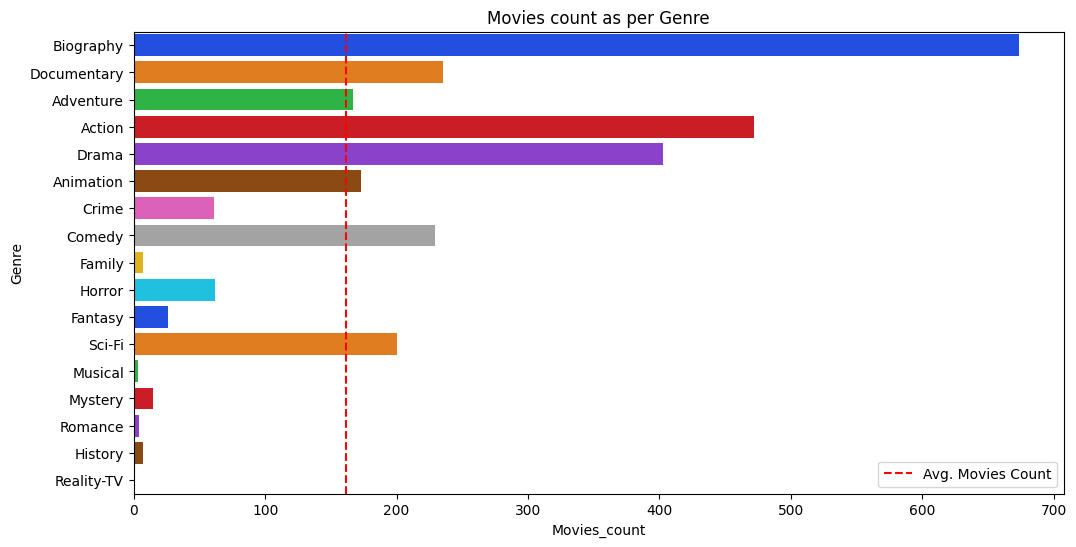

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(df, y='Genre', color='red', palette='bright', legend=True)
plt.axvline(x=count_df.movies_count.mean(), color='r', linestyle='--', label='Avg. Movies Count')
plt.xlabel('Movies_count')
plt.title('Movies count as per Genre')
plt.legend()
plt.savefig('movie_count_by_genre.png')
plt.show()

In [21]:
median_rating_df = df.groupby('Genre')['IMDb Rating'].median().reset_index(name='median_rating').sort_values('median_rating', ascending=False)

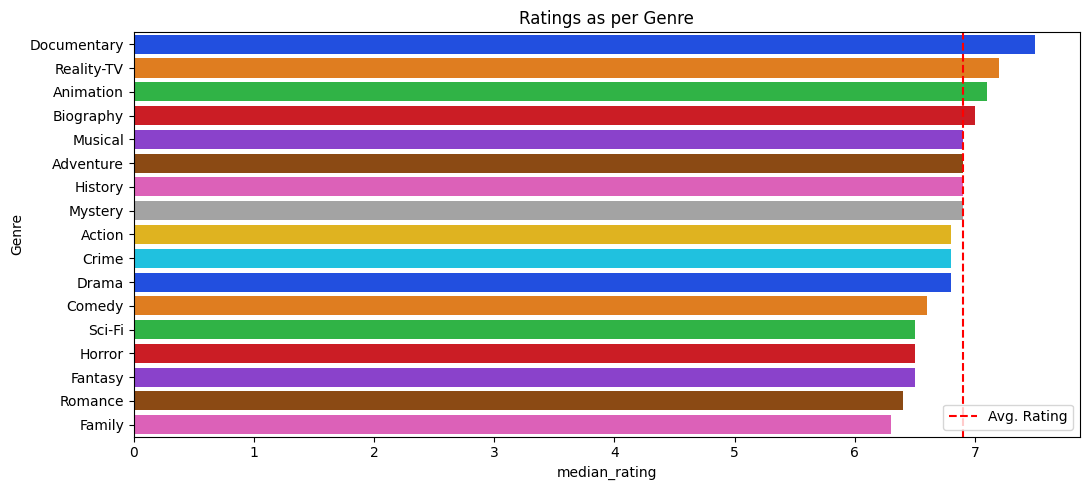

In [22]:
plt.figure(figsize=(11, 5))
sns.barplot(median_rating_df, y='Genre', x='median_rating', palette='bright')
plt.axvline(x=df['IMDb Rating'].mean(), color='r', linestyle='--', label='Avg. Rating')
plt.title('Ratings as per Genre')
plt.tight_layout()
plt.legend()
plt.savefig('median_ratings_by_genre.png')
plt.show()

In [23]:
rating_df1 = df.groupby('Genre')['IMDb Rating'].median().reset_index(name='median_rating')
rating_df2 = df.groupby('Genre')['IMDb Rating'].count().reset_index(name='counts')
merged_rating_df = pd.merge(rating_df1, rating_df2, on='Genre').sort_values('median_rating', ascending=False)

In [24]:
merged_rating_df

,Genre,median_rating,counts
6,Documentary,7.5,235
14,Reality-TV,7.2,1
2,Animation,7.1,173
3,Biography,7.0,674
12,Musical,6.9,3
1,Adventure,6.9,167
10,History,6.9,7
13,Mystery,6.9,15
0,Action,6.8,472
5,Crime,6.8,61


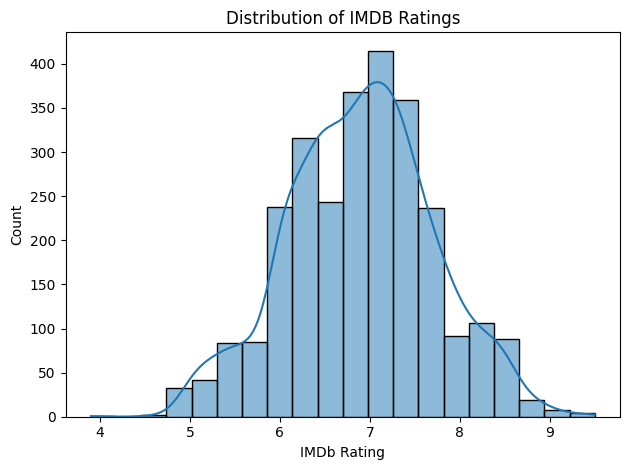

In [25]:
sns.histplot(df, x='IMDb Rating', bins=20, kde=True)
plt.title('Distribution of IMDB Ratings')
plt.tight_layout()
plt.show()

In [26]:
Q1, Q3 = df['IMDb Rating'].quantile([0.25, 0.75])

In [27]:
IQR = Q3 - Q1
IQR

1.0

In [28]:
lower_bound = (Q1 - 1.5*IQR)
upper_bound = (Q3 + 1.5*IQR)
lower_bound, upper_bound

(4.9, 8.9)

In [29]:
newdf = df[(df['IMDb Rating'] > lower_bound) & (df['IMDb Rating'] < upper_bound)]

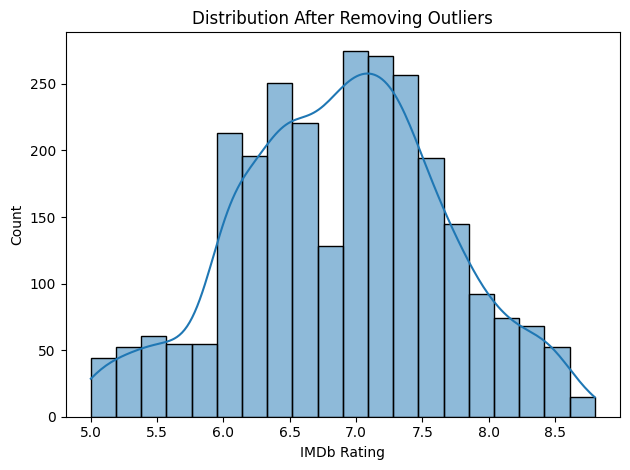

In [30]:
sns.histplot(x=newdf['IMDb Rating'], bins=20, kde=True)
plt.title('Distribution After Removing Outliers')
plt.tight_layout()
plt.savefig('imdb_rating_distribution.png')
plt.show()

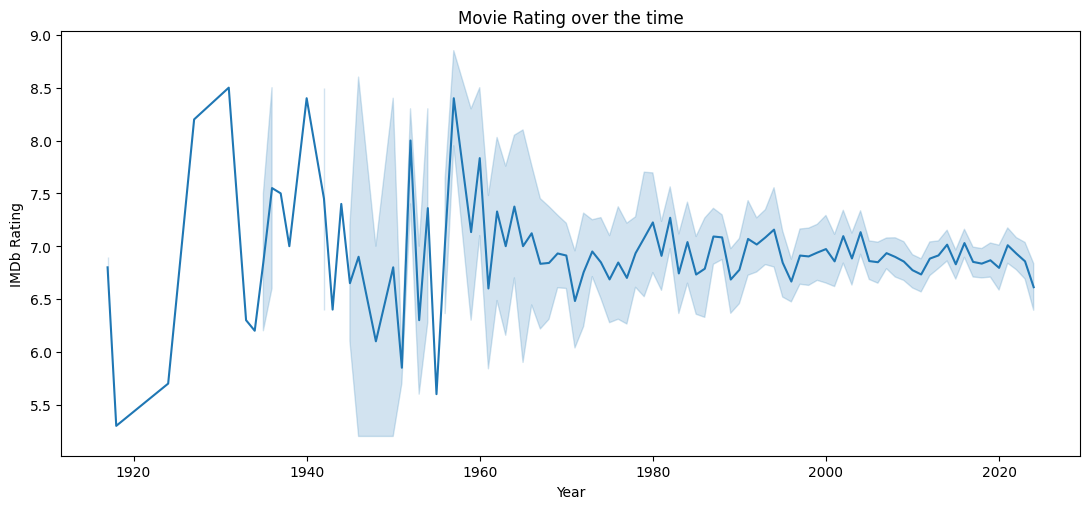

In [31]:
plt.figure(figsize=(11, 5))
sns.lineplot(df, y='IMDb Rating', x='Year')
plt.tight_layout()
plt.title('Movie Rating over the time')
plt.show()

In [32]:
df.head()

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes)
1,Elvira Madigan,7.0,1967,PG,Biography,Bo Widerberg,Pia DegermarkThommy BerggrenLennart Malmer,66.0,91.0
2,The Kid Stays in the Picture,7.3,2002,R,Documentary,Nanette Burstein,Robert EvansEddie AlbertPeter Bart,75.0,93.0
4,Mahler,7.0,1974,PG,Biography,Ken Russell,Robert PowellGeorgina HaleLee Montague,66.0,115.0
5,The Dark Horse,7.4,2014,R,Biography,James Napier Robertson,Cliff CurtisJames RollestonKirk Torrance,77.0,124.0
6,Stephen Curry: Underrated,7.3,2023,PG-13,Documentary,Peter Nicks,Stephen CurryBob McKillopJason Richards,69.0,110.0


In [33]:
df['Certificates'].unique()

array(['PG', 'R', 'PG-13', 'G', 'Approved', 'NC-17', 'TV-MA', 'Not Rated',
       'Unrated', 'TV-PG', 'TV-14', 'X', 'Passed', 'TV-G', 'M/PG',
       'TV-Y7'], dtype=object)

#### G, TV-G: Suitable for all ages.
#### PG, TV-PG: Parental guidance suggested.
#### PG-13, TV-14: Parents strongly cautioned.
#### R, TV-MA, NC-17: Restricted to older audiences or adults only.
#### Not Rated, Unrated: Not rated by any official rating organization.
#### Approved, Passed: Older classifications indicating suitability for general audiences.
#### X: Adult films (largely replaced by NC-17).
#### M/PG: Mature parental guidance (replaced by PG).
#### TV-Y7: Suitable for children 7 and older.

In [34]:
certificate_df = df['Certificates'].value_counts().reset_index(name='Counts')

In [35]:
certificate_df.head()

,Certificates,Counts
0,R,1601
1,PG-13,532
2,PG,378
3,Not Rated,94
4,G,83


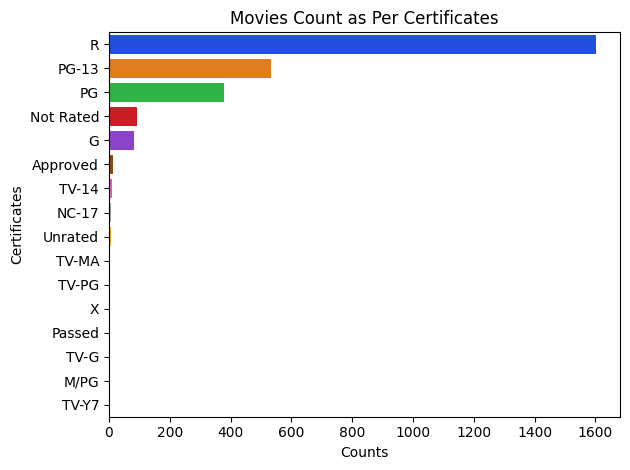

In [36]:
sns.barplot(certificate_df, x='Counts', y='Certificates', palette='bright')
plt.title('Movies Count as Per Certificates')
plt.tight_layout()
plt.show()

In [37]:
certificate_rating_df = df.groupby('Certificates')['IMDb Rating'].median().reset_index(name='Avg_rating').sort_values('Avg_rating', ascending=False)

In [38]:
certificate_rating_df.head()

,Certificates,Avg_rating
9,TV-14,7.6
0,Approved,7.5
1,G,7.4
2,M/PG,7.4
5,PG,7.2


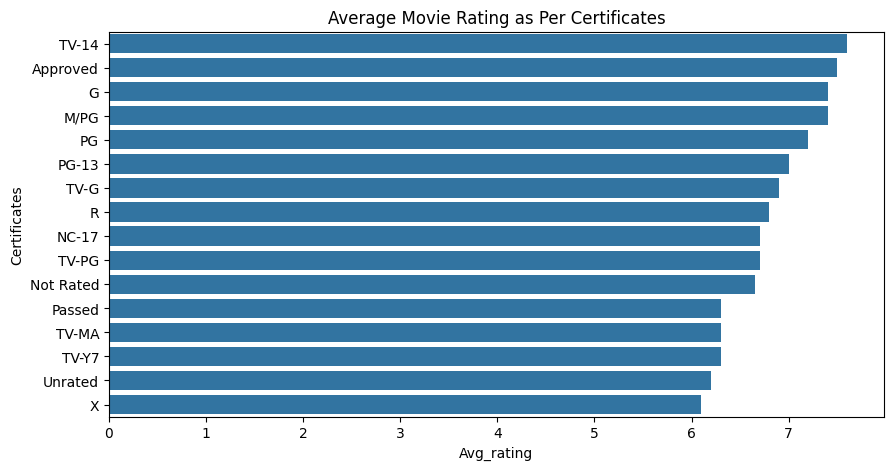

In [39]:
plt.figure(figsize=(10, 5))
sns.barplot(certificate_rating_df, x='Avg_rating', y='Certificates')
plt.title('Average Movie Rating as Per Certificates')
plt.show()

In [40]:
df.head()

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes)
1,Elvira Madigan,7.0,1967,PG,Biography,Bo Widerberg,Pia DegermarkThommy BerggrenLennart Malmer,66.0,91.0
2,The Kid Stays in the Picture,7.3,2002,R,Documentary,Nanette Burstein,Robert EvansEddie AlbertPeter Bart,75.0,93.0
4,Mahler,7.0,1974,PG,Biography,Ken Russell,Robert PowellGeorgina HaleLee Montague,66.0,115.0
5,The Dark Horse,7.4,2014,R,Biography,James Napier Robertson,Cliff CurtisJames RollestonKirk Torrance,77.0,124.0
6,Stephen Curry: Underrated,7.3,2023,PG-13,Documentary,Peter Nicks,Stephen CurryBob McKillopJason Richards,69.0,110.0


In [41]:
director_rating_df = df.groupby('Director')['IMDb Rating'].mean().reset_index(name='Movies_rating').sort_values('Movies_rating', ascending=False)

In [42]:
director_rating_df.head(10)

,Director,Movies_rating
94,Andrew Kent,9.50
1849,Steven Scaffidi,9.50
1386,Nayo Titzin,9.30
1320,Michael Righini,9.20
1034,Kailer Scopacasa,9.00
591,Frank Darabont,8.95
424,David Aubrey,8.90
1987,Vidhu Vinod Chopra,8.90
51,Alex Feldman,8.80
271,Callum Davies,8.80


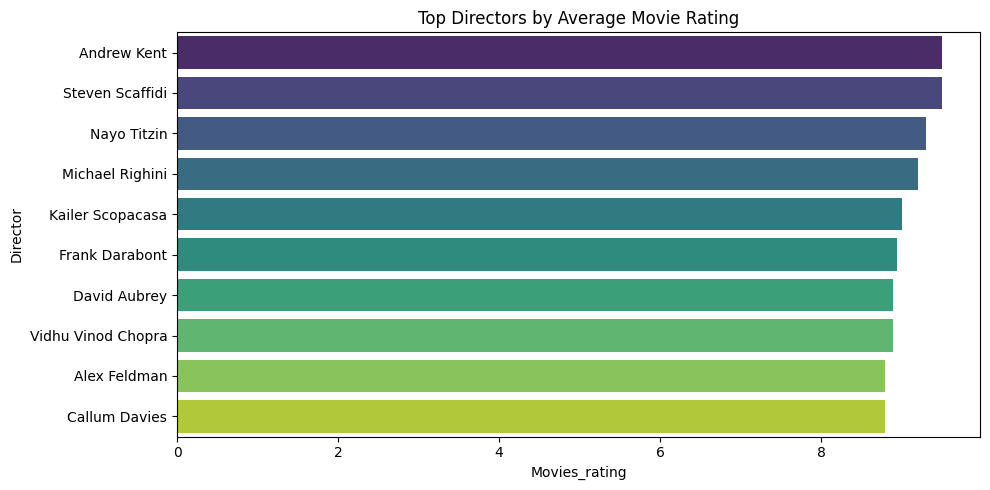

In [43]:
plt.figure(figsize=(10, 5))
sns.barplot(director_rating_df.head(10), x='Movies_rating', y='Director', palette='viridis')
plt.title('Top Directors by Average Movie Rating')
plt.tight_layout()
plt.show()

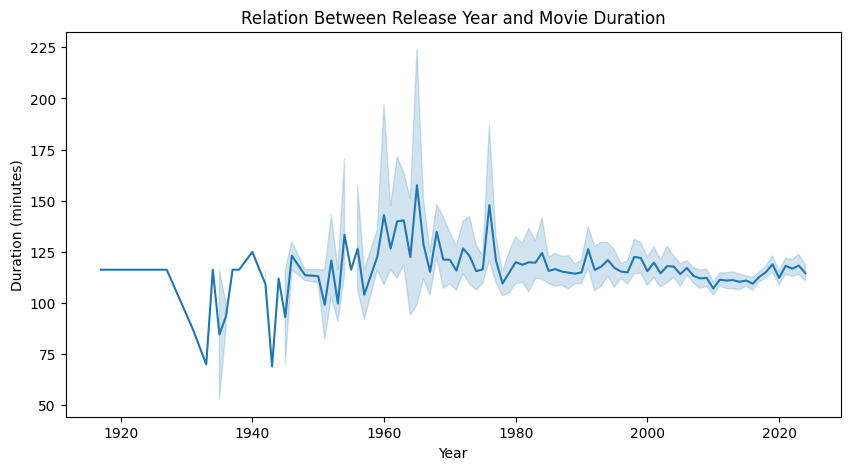

In [44]:
plt.figure(figsize=(10, 5))
sns.lineplot(df, x='Year', y='Duration (minutes)')
plt.title('Relation Between Release Year and Movie Duration')
plt.show()

In [45]:
movie_count_by_year = df.groupby('Year')['Title'].count().reset_index(name='Movies_count').sort_values('Year', ascending=False)

In [46]:
movie_count_by_year.head()

,Year,Movies_count
91,2024,50
90,2023,95
89,2022,70
88,2021,78
87,2020,60


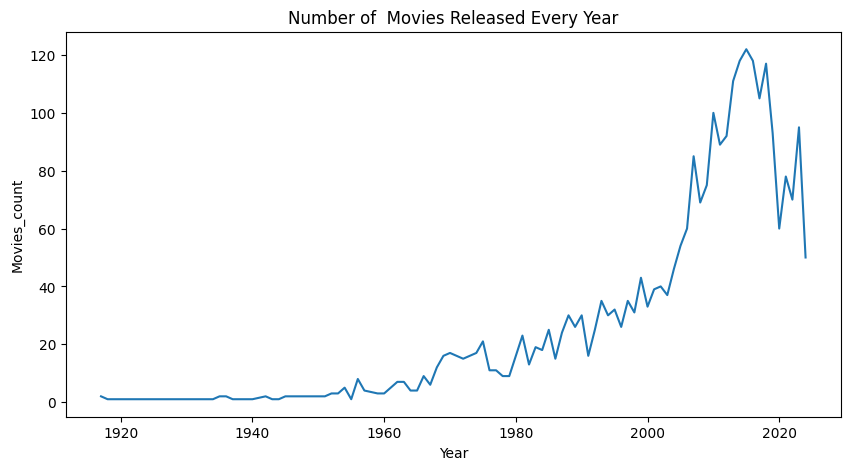

In [47]:
plt.figure(figsize=(10, 5))
sns.lineplot(movie_count_by_year, y='Movies_count', x='Year')
plt.title('Number of  Movies Released Every Year')
plt.savefig('movies_released_per_year.png')
plt.show()

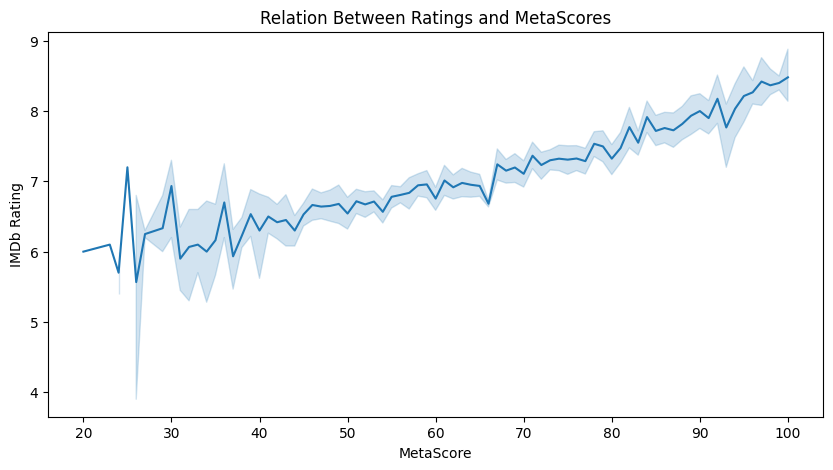

In [48]:
plt.figure(figsize=(10, 5))
sns.lineplot(df, x='MetaScore', y='IMDb Rating')
plt.title('Relation Between Ratings and MetaScores')
plt.show()

In [49]:
df.columns

Index(['Title', 'IMDb Rating', 'Year', 'Certificates', 'Genre', 'Director',
       'Star Cast', 'MetaScore', 'Duration (minutes)'],
      dtype='object')

In [50]:
numeric_cols = ['IMDb Rating', 'Year', 'MetaScore', 'Duration (minutes)']

In [51]:
correlation_matrix = df[numeric_cols].corr()

In [52]:
correlation_matrix

,IMDb Rating,Year,MetaScore,Duration (minutes)
IMDb Rating,1.000000,-0.030529,0.405460,0.176646
Year,-0.030529,1.000000,-0.124087,-0.105088
MetaScore,0.405460,-0.124087,1.000000,0.111517
Duration (minutes),0.176646,-0.105088,0.111517,1.000000


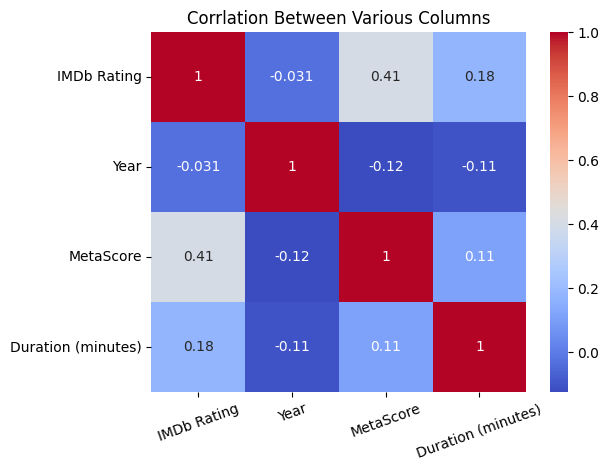

In [53]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Corrlation Between Various Columns')
plt.xticks(rotation=20)
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()

## Key Findings

1. <span style="font-size: 18px;">**Strong Correlation**: There is a strong correlation between IMDb ratings and MetaScores.</span>
2. <span style="font-size: 18px;">**Common Genres**: The most common genres are Biography, Action, Drama, and Documentary.</span>
3. <span style="font-size: 18px;">**High-Rated Genres**: High-rated genres include Documentary, Animation, and Biography.</span>
4. <span style="font-size: 18px;">**Stable Ratings**: Movie ratings have been more stable in the current decade compared to the past.</span>
5. <span style="font-size: 18px;">**Certificate Analysis**: Movies with a Restricted certificate are the most frequent, while ratings for TV-14 and Approved certificates are higher.</span>
6. <span style="font-size: 18px;">**Top Directors**: Directors Andrew Kent and Steven Scaffidi have movies with high ratings.</span>
7. <span style="font-size: 18px;">**Release Trends**: The number of movies released increased year by year until it suddenly dropped after 2018.</span>